Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


In [402]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

import numpy as np

In [403]:
startup=pd.read_csv('/content/50_Startups.csv')

In [404]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [405]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## **TO FIND DUPLICATES**

In [406]:
startup.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [407]:
startup[startup.duplicated()].shape

(0, 5)

## **RENAME COLUMNS**

In [408]:
startup.rename(columns={'R&D Spend':'rdspend','Administration':'admin', 'Marketing Spend':'Mspend'},inplace=True)

In [409]:
startup.head()

,rdspend,admin,Mspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## **OUTLIER DETECTION**

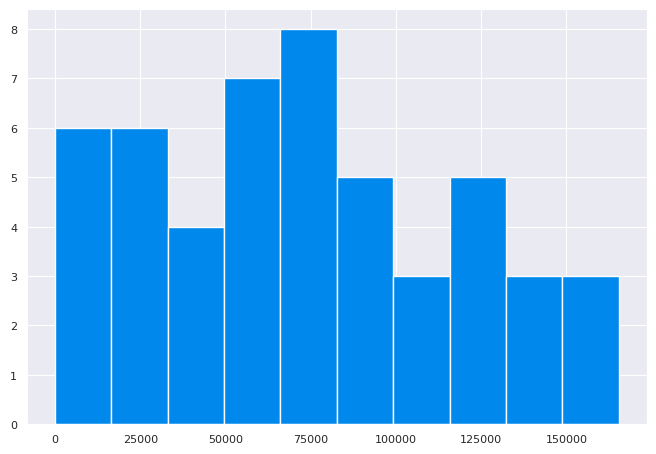

In [410]:
#USING HISTOGRAM
startup['rdspend'].hist()

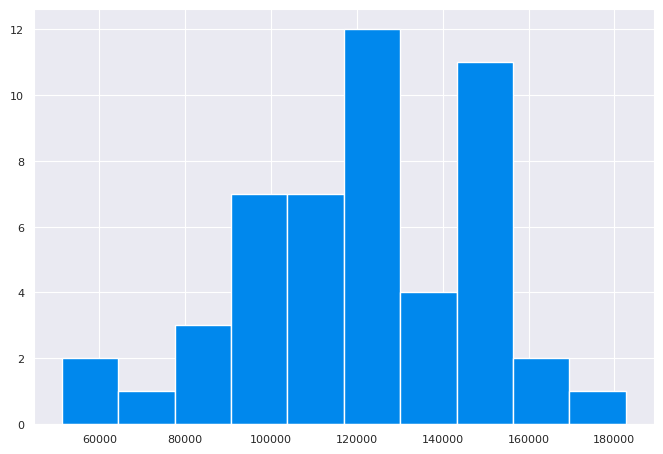

In [411]:
startup['admin'].hist()

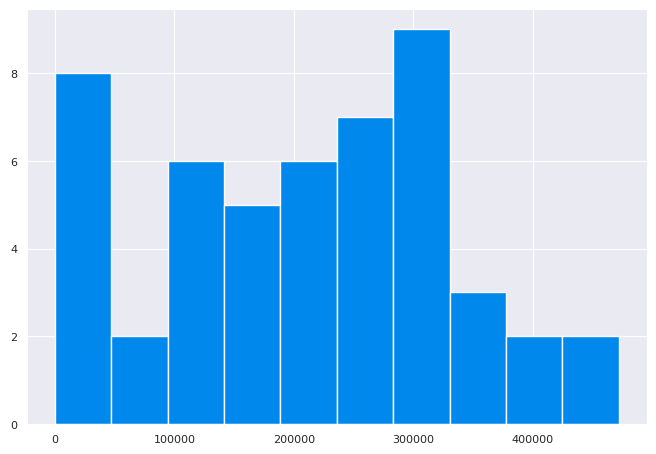

In [412]:
startup['Mspend'].hist()

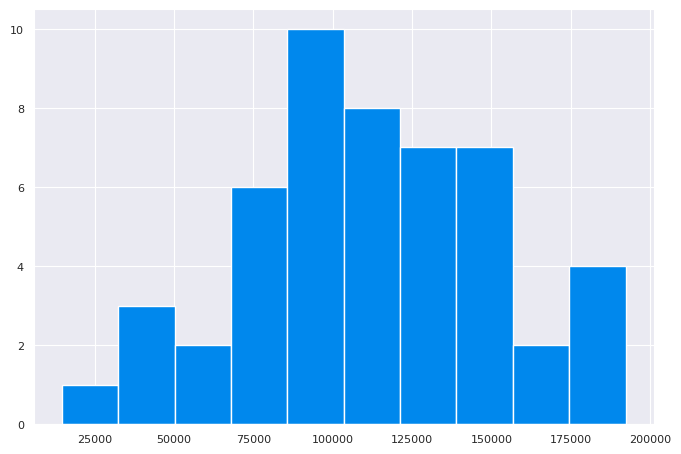

In [413]:
startup['Profit'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f83a3f02e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f83a3e88f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f83a3e90f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f83a3e90a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f83a3f02fd0>,
  <matplotlib.lines.Line2D at 0x7f83a3e889d0>]}

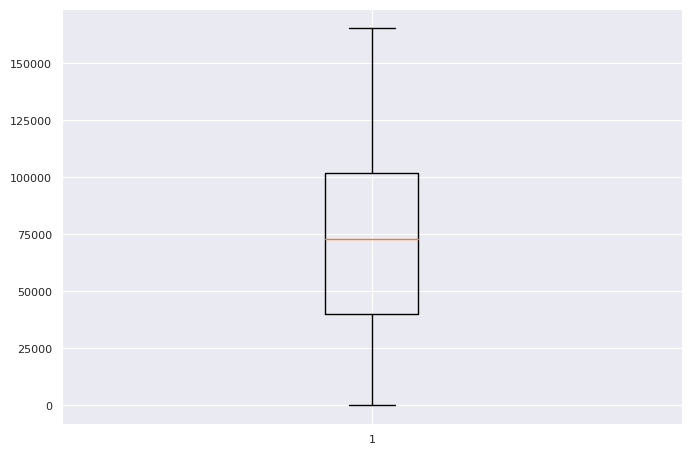

In [414]:
plt.boxplot(startup.rdspend)

{'boxes': [<matplotlib.lines.Line2D at 0x7f83a3e73250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f83a3e73e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f83a3e7aed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f83a3e7ad50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f83a3e737d0>,
  <matplotlib.lines.Line2D at 0x7f83a3e73d10>]}

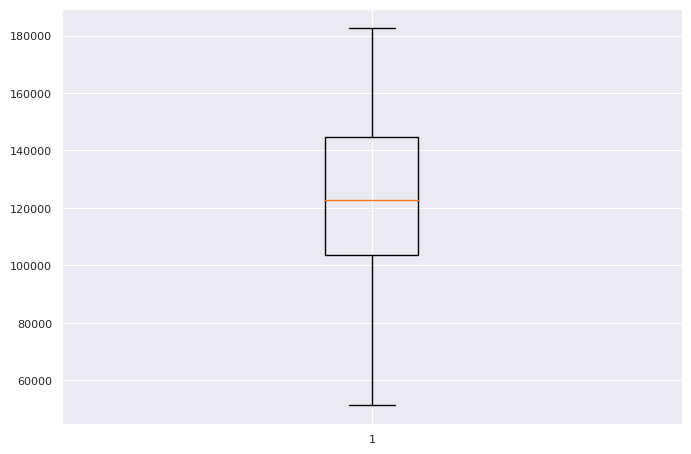

In [415]:
plt.boxplot(startup.admin)

{'boxes': [<matplotlib.lines.Line2D at 0x7f83a3dde650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f83a3de4690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f83a3dec6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f83a3dec190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f83a3ddebd0>,
  <matplotlib.lines.Line2D at 0x7f83a3dded10>]}

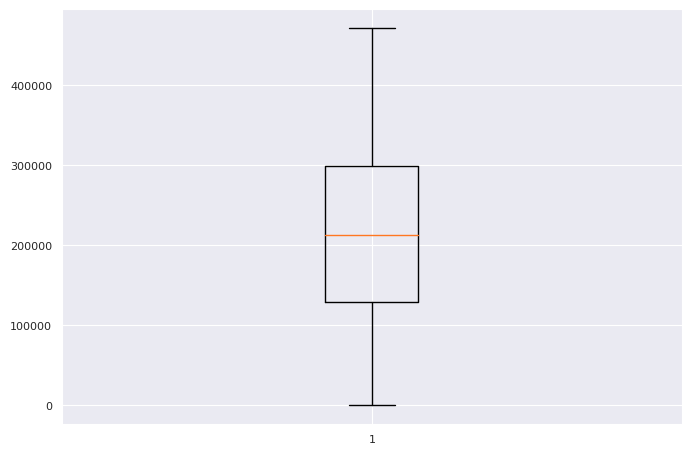

In [416]:
plt.boxplot(startup.Mspend)

{'boxes': [<matplotlib.lines.Line2D at 0x7f83a3dbee90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f83a3dc5ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f83a3d4bf10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f83a3d4b9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f83a3dbefd0>,
  <matplotlib.lines.Line2D at 0x7f83a3dc5990>]}

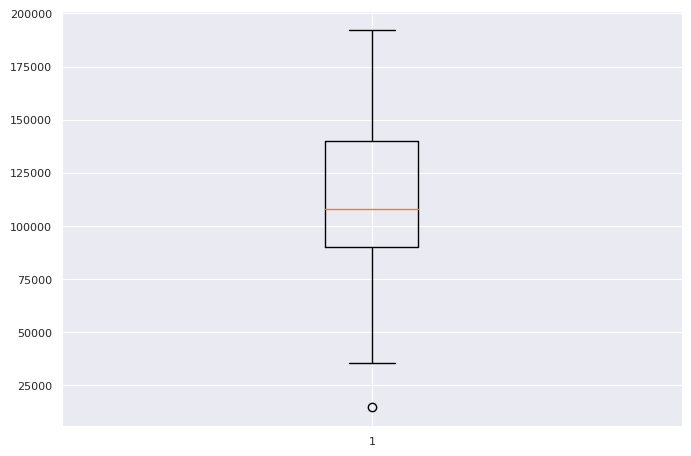

In [417]:
plt.boxplot(startup.Profit)

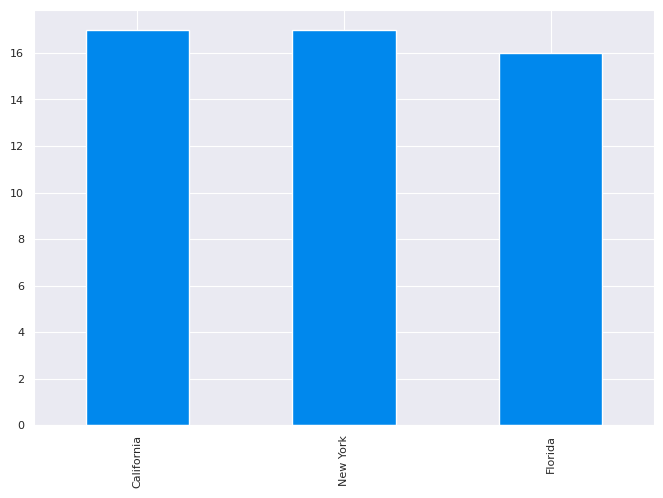

In [418]:
##bar plot for categorical data

startup['State'].value_counts().plot.bar()

# **MISSING VALUES**

In [419]:
startup.isna().sum()

rdspend    0
admin      0
Mspend     0
State      0
Profit     0
dtype: int64

# **CORRELATION MATRIX**

In [420]:
startup.corr()

,rdspend,admin,Mspend,Profit
rdspend,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
Mspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [421]:
startup.describe()


,rdspend,admin,Mspend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## **# Transformations**

## **#### Dummy Variable**

In [422]:
#Creating dummy variable for State column
startup=pd.get_dummies(startup,columns=['State'])

In [423]:
startup.head()

,rdspend,admin,Mspend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## **TO CARRY OUT FEATURE SCALING**

## **NORMALISATION**

In [424]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [425]:
startup.values


array([[1.65e+05, 1.37e+05, 4.72e+05, 1.92e+05, 0.00e+00, 0.00e+00,
        1.00e+00],
       [1.63e+05, 1.51e+05, 4.44e+05, 1.92e+05, 1.00e+00, 0.00e+00,
        0.00e+00],
       [1.53e+05, 1.01e+05, 4.08e+05, 1.91e+05, 0.00e+00, 1.00e+00,
        0.00e+00],
       [1.44e+05, 1.19e+05, 3.83e+05, 1.83e+05, 0.00e+00, 0.00e+00,
        1.00e+00],
       [1.42e+05, 9.14e+04, 3.66e+05, 1.66e+05, 0.00e+00, 1.00e+00,
        0.00e+00],
       [1.32e+05, 9.98e+04, 3.63e+05, 1.57e+05, 0.00e+00, 0.00e+00,
        1.00e+00],
       [1.35e+05, 1.47e+05, 1.28e+05, 1.56e+05, 1.00e+00, 0.00e+00,
        0.00e+00],
       [1.30e+05, 1.46e+05, 3.24e+05, 1.56e+05, 0.00e+00, 1.00e+00,
        0.00e+00],
       [1.21e+05, 1.49e+05, 3.12e+05, 1.52e+05, 0.00e+00, 0.00e+00,
        1.00e+00],
       [1.23e+05, 1.09e+05, 3.05e+05, 1.50e+05, 1.00e+00, 0.00e+00,
        0.00e+00],
       [1.02e+05, 1.11e+05, 2.29e+05, 1.46e+05, 0.00e+00, 1.00e+00,
        0.00e+00],
       [1.01e+05, 9.18e+04, 2.50e+05, 1.44e

In [426]:
array = startup.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

In [427]:
#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.   0.65 1.   1.   0.  ]
 [0.98 0.76 0.94 1.   1.  ]
 [0.93 0.38 0.86 0.99 0.  ]
 [0.87 0.51 0.81 0.95 0.  ]
 [0.86 0.31 0.78 0.85 0.  ]]


In [428]:
###THE DATA HAS BEEN TRANSFORMED WITH VALUES RANGING FROM 0-1

## **STANDARDISATION**

In [429]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [430]:
array = startup.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

In [431]:
# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 2.02  0.56  2.15  2.01 -0.72 -0.69  1.39]
 [ 1.96  1.08  1.92  2.    1.39 -0.69 -0.72]
 [ 1.75 -0.73  1.63  1.98 -0.72  1.46 -0.72]
 [ 1.55 -0.1   1.42  1.78 -0.72 -0.69  1.39]
 [ 1.5  -1.08  1.28  1.36 -0.72  1.46 -0.72]]


In [432]:
rescaledX


array([[ 2.02e+00,  5.61e-01,  2.15e+00,  2.01e+00, -7.18e-01, -6.86e-01,
         1.39e+00],
       [ 1.96e+00,  1.08e+00,  1.92e+00,  2.00e+00,  1.39e+00, -6.86e-01,
        -7.18e-01],
       [ 1.75e+00, -7.28e-01,  1.63e+00,  1.98e+00, -7.18e-01,  1.46e+00,
        -7.18e-01],
       [ 1.55e+00, -9.64e-02,  1.42e+00,  1.78e+00, -7.18e-01, -6.86e-01,
         1.39e+00],
       [ 1.50e+00, -1.08e+00,  1.28e+00,  1.36e+00, -7.18e-01,  1.46e+00,
        -7.18e-01],
       [ 1.28e+00, -7.76e-01,  1.25e+00,  1.13e+00, -7.18e-01, -6.86e-01,
         1.39e+00],
       [ 1.34e+00,  9.32e-01, -6.88e-01,  1.11e+00,  1.39e+00, -6.86e-01,
        -7.18e-01],
       [ 1.25e+00,  8.72e-01,  9.32e-01,  1.10e+00, -7.18e-01,  1.46e+00,
        -7.18e-01],
       [ 1.03e+00,  9.87e-01,  8.31e-01,  1.01e+00, -7.18e-01, -6.86e-01,
         1.39e+00],
       [ 1.09e+00, -4.57e-01,  7.76e-01,  9.46e-01,  1.39e+00, -6.86e-01,
        -7.18e-01],
       [ 6.20e-01, -3.88e-01,  1.50e-01,  8.55e-01, -7.18e-0

In [433]:
###THE DATA HAS BEEN TRANSFORMED WITH VALUES RANGING FROM -3to 3

# **AUTOMATE THE EDA PROCESS**

## **# Speed up the EDA process BY PANDAS_PROFILING LIBRARY**

In [434]:
!pip install pandas_Profiling==2.7.1
!pip install sweetviz

In [435]:
import pandas_profiling as pp
import sweetviz as sv

In [436]:
EDA_startup_report= pp.ProfileReport(startup)
EDA_startup_report.to_file(output_file='startup_report.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **# Speed up the EDA process BY SWEETVIZ LIBRARY**

In [437]:
sweet_report = sv.analyze(startup)
sweet_report.show_html('startup_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report startup_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **PAIR PLOT------HISTOGRAM AND SCATTERPLOT**

In [438]:
#fomat the the plot background and scatterplots for all the variables

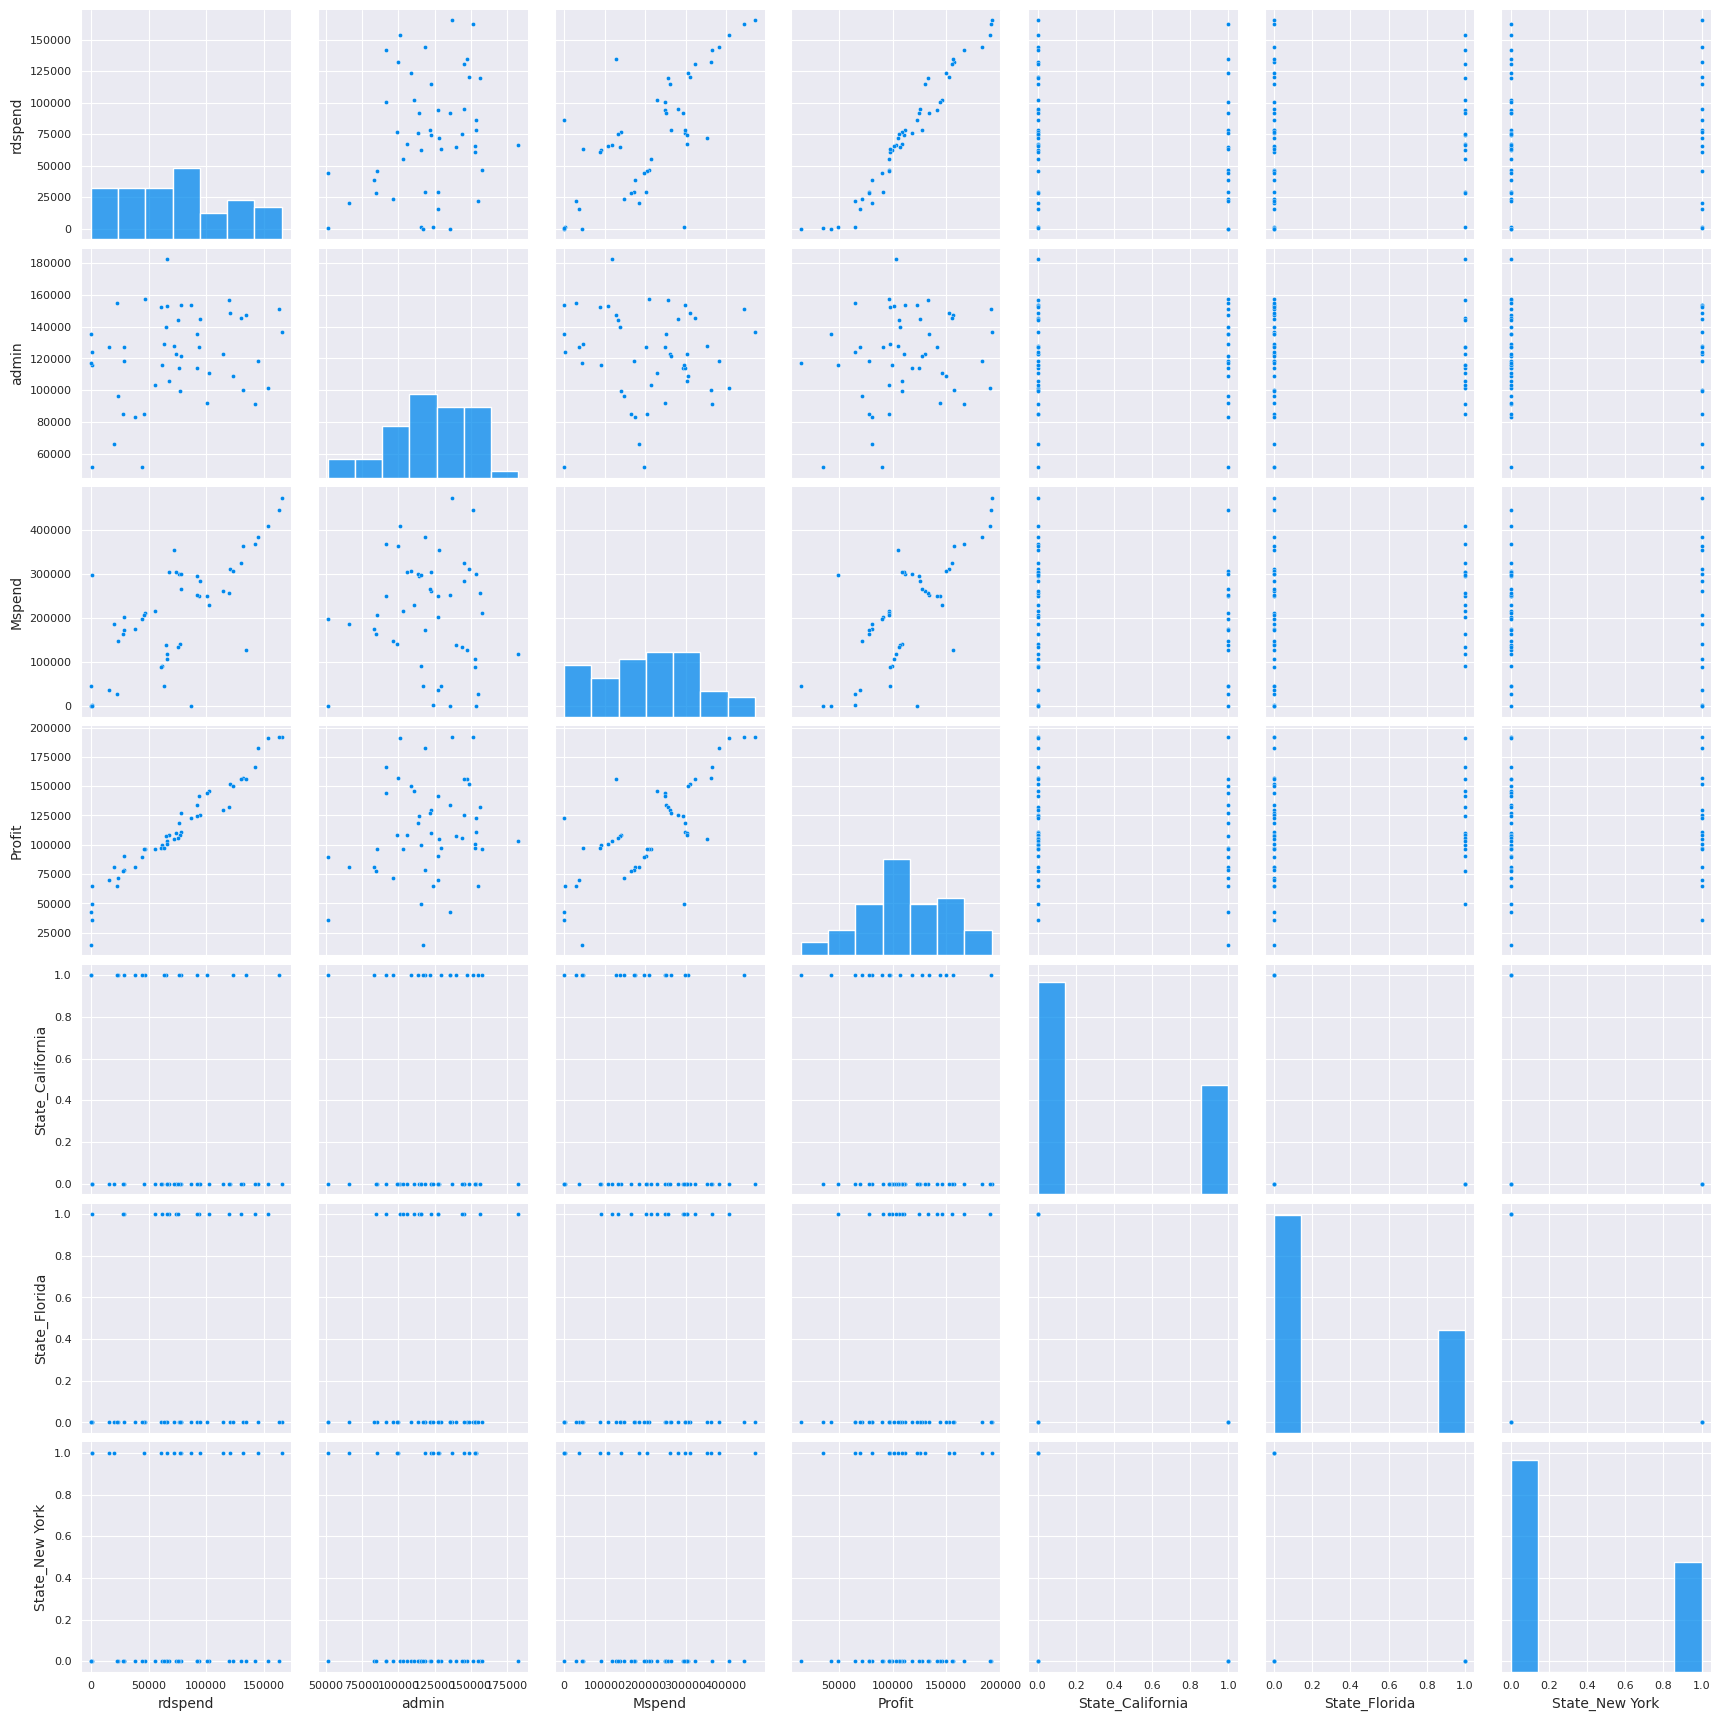

In [439]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

# **BIULDING A MODEL**

In [440]:
startup.rename(columns={'State_New York':'State_NY'},inplace=True)

In [441]:
model=smf.ols('Profit~rdspend+admin+Mspend+State_California+State_Florida+State_NY',data=startup).fit()

In [442]:
#coefficients
model.params

Intercept           37633.233317
rdspend                 0.806023
admin                  -0.027004
Mspend                  0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NY            12450.223495
dtype: float64

In [443]:
####t-value and p value
print(model.tvalues, '\n', model.pvalues)

Intercept            7.417409
rdspend             17.368580
admin               -0.517012
Mspend               1.573889
State_California     5.099242
State_Florida        4.654306
State_NY             5.007401
dtype: float64 
 Intercept           2.807645e-09
rdspend             2.578772e-21
admin               6.077373e-01
Mspend              1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NY            9.409010e-06
dtype: float64


In [444]:
##R^2 value
(model.rsquared, model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [445]:
##admin  and Mspend are insignificant.(admin----6.077373e-01 and Mspend--.226769e-01) because their pvalues are greater than 0.05

## **SIMPLE LINEAR REGRESSION MODELS**

In [446]:
startup.corr()

,rdspend,admin,Mspend,Profit,State_California,State_Florida,State_NY
rdspend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Mspend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [447]:
### Profit Vs admin

ml_a=smf.ols('Profit~admin',data = startup).fit()  

#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept    3.040044
admin        1.419493
dtype: float64 
 Intercept    0.003824
admin        0.162217
dtype: float64


In [448]:
##R^2 value
(ml_a.rsquared, ml_a.rsquared_adj)

(0.04028714077757245, 0.020293122877105274)

In [449]:
### Profit Vs Mspend

ml_m=smf.ols('Profit~Mspend',data = startup).fit()  

#t and p-Values
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept    7.808356
Mspend       7.802657
dtype: float64 
 Intercept    4.294735e-10
Mspend       4.381073e-10
dtype: float64


In [450]:
##R^2 value
(ml_m.rsquared, ml_m.rsquared_adj)

(0.5591535746115515, 0.5499692740826254)

In [451]:
### Profit Vs admin and Mspend
ml_am=smf.ols('Profit~admin+Mspend',data = startup).fit()  

#t and p-Values
print(ml_am.tvalues, '\n', ml_am.pvalues)  

Intercept    1.142741
admin        2.467779
Mspend       8.281039
dtype: float64 
 Intercept    2.589341e-01
admin        1.729198e-02
Mspend       9.727245e-11
dtype: float64


In [452]:
##R^2 value
(ml_am.rsquared, ml_am.rsquared_adj)

(0.6097229746770663, 0.593115441684601)

In [453]:
####Profit Vs admin and Mspend BECOMES SIGNIFICANT BECAUSE THE P VALUR IS < THAN 0.05

In [454]:
startup.corr()

,rdspend,admin,Mspend,Profit,State_California,State_Florida,State_NY
rdspend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Mspend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


## **CALCULATING VIF VALUE**

In [455]:
rsq_rdspend = smf.ols('rdspend~admin+Mspend+State_California+State_Florida+State_NY',data=startup).fit().rsquared  
vif_rdspend = 1/(1-rsq_rdspend) # 2.4955109
vif_rdspend

2.4955109215494433

In [456]:
rsq_admin= smf.ols('admin~rdspend+Mspend+State_California+State_Florida+State_NY',data=startup).fit().rsquared  
vif_admin = 1/(1-rsq_admin) # 1.177766
vif_admin

1.1777660508993844

In [457]:
rsq_Mspend= smf.ols('Mspend~rdspend+admin+State_California+State_Florida+State_NY',data=startup).fit().rsquared  
vif_Mspend = 1/(1-rsq_Mspend) # 2.416796
vif_Mspend

2.4167967566863946

# **# Residual Analysis**

In [458]:
## Test for Normality of Residuals (Q-Q Plot)

In [459]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rdspend           50 non-null     float64
 1   admin             50 non-null     float64
 2   Mspend            50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_NY          50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [460]:
## Residual Plot for Homoscedasticity

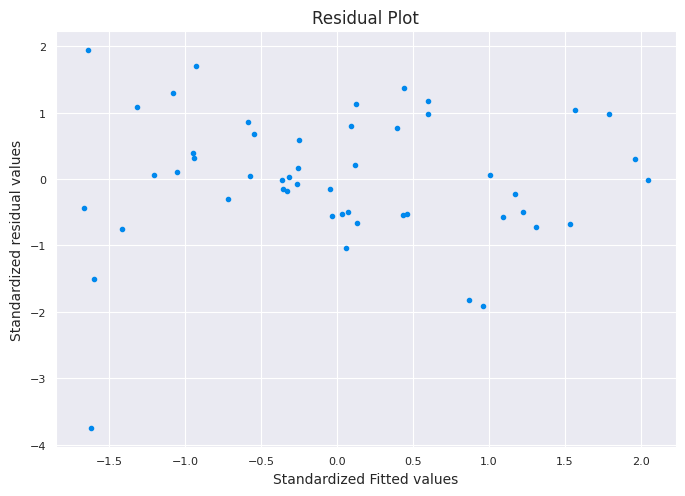

In [461]:
def get_standardized_values(vals):return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [462]:
startup.corr()

,rdspend,admin,Mspend,Profit,State_California,State_Florida,State_NY
rdspend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Mspend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


## **# Model Deletion Diagnostics**

## **## Detecting Influencers/Outliers**

## **## Cook’s Distance**

In [463]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


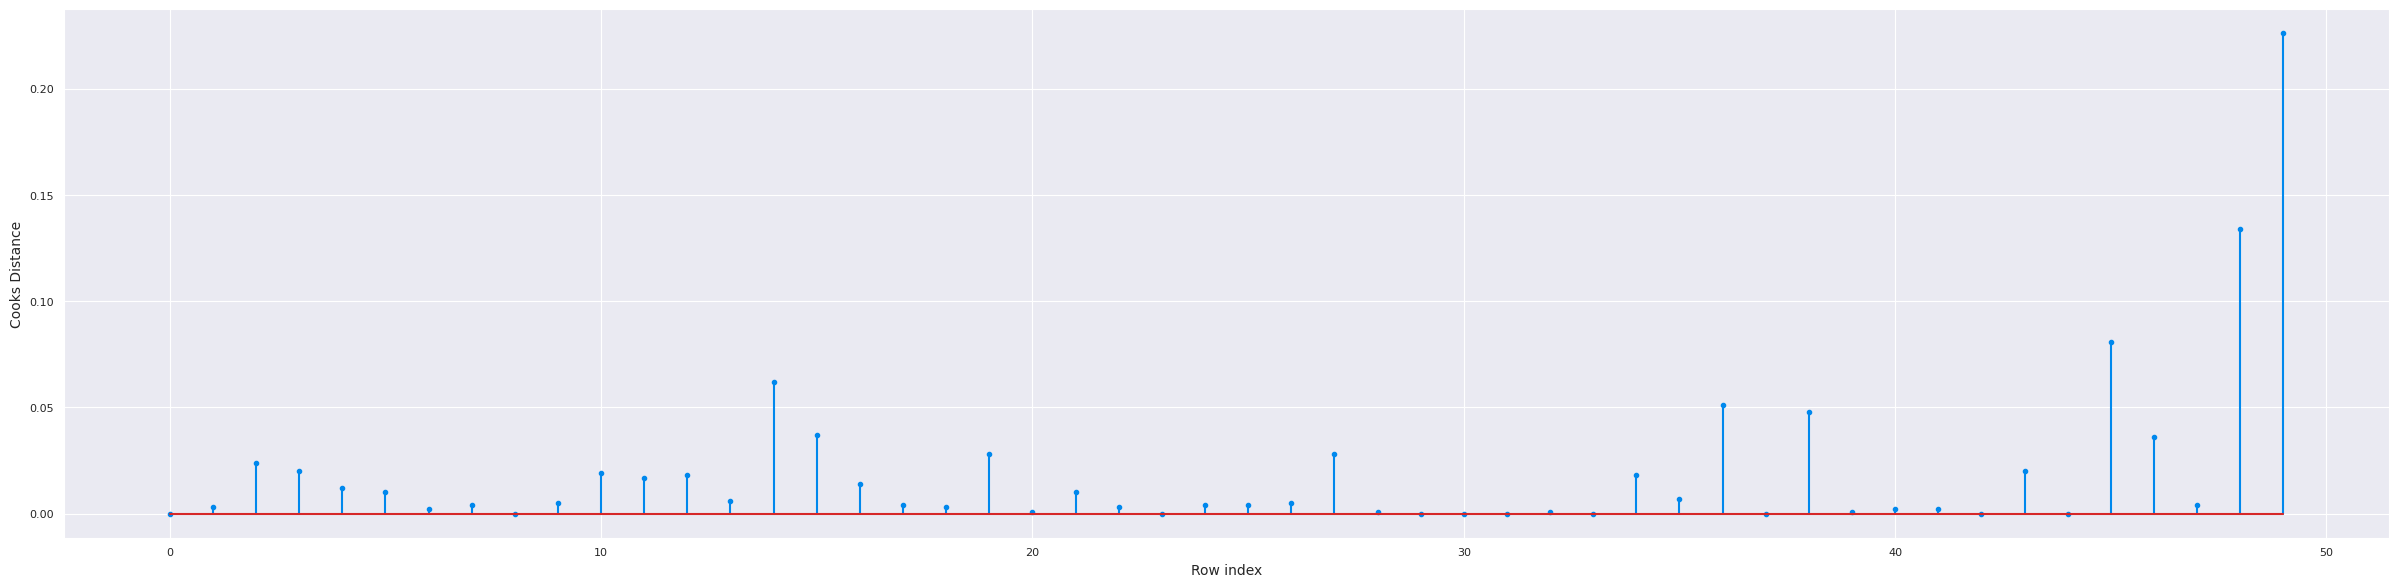

In [464]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(30, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [465]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.22625094501509233)

## **High Influence points**

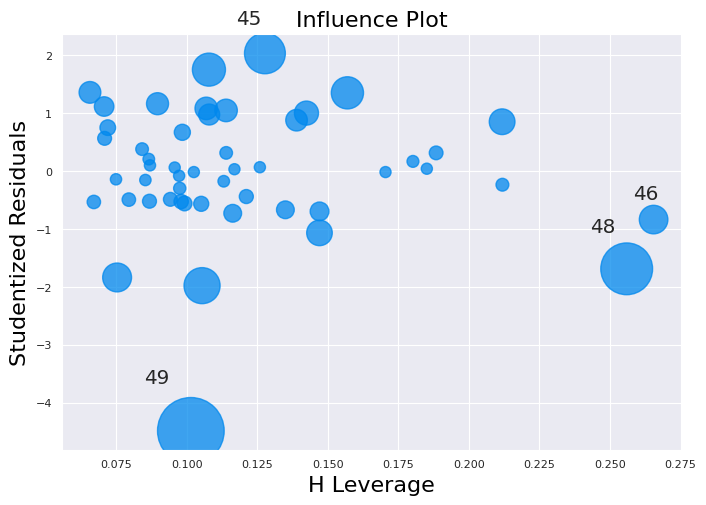

In [466]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [467]:
#### From the above plot, it is evident that data point 49 is the influencers

## **# Improving the model**

In [468]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup1=startup.drop(startup.index[[47,49]],axis=0).reset_index()

In [ ]:
#Drop the original index
startup1=startup1.drop(['index'],axis=1)
startup1

In [480]:
startup1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rdspend           48 non-null     float64
 1   admin             48 non-null     float64
 2   Mspend            48 non-null     float64
 3   Profit            48 non-null     float64
 4   State_California  48 non-null     uint8  
 5   State_Florida     48 non-null     uint8  
 6   State_NY          48 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [481]:
startup1.shape

(48, 7)

## **# Build Model**

In [482]:
#Exclude variable "admin" and generate R-Squared and AIC values
final_ml_m=smf.ols('Profit~rdspend+Mspend+State_California+State_Florida+State_NY',data=startup1).fit()

In [485]:
(final_ml_m.rsquared,final_ml_m.aic)

(0.9596879553267752, 1001.1536438674137)

In [483]:
#Exclude variable "Mspend" and generate R-Squared and AIC values
final_ml_a=smf.ols('Profit~rdspend+admin+State_California+State_Florida+State_NY',data=startup1).fit()

In [484]:
(final_ml_a.rsquared,final_ml_a.aic)

(0.9569918852060395, 1004.2610925616418)

In [476]:
#### Comparing above R-Square and AIC values, model 'final_ml_m' has high R- square and low AIC value hence include variable 'mspend' so that multi collinearity problem would be resolved.

## **# Cook’s Distance**

In [486]:
model_influence_m = final_ml_m.get_influence()
(c_m, _) = model_influence_m.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


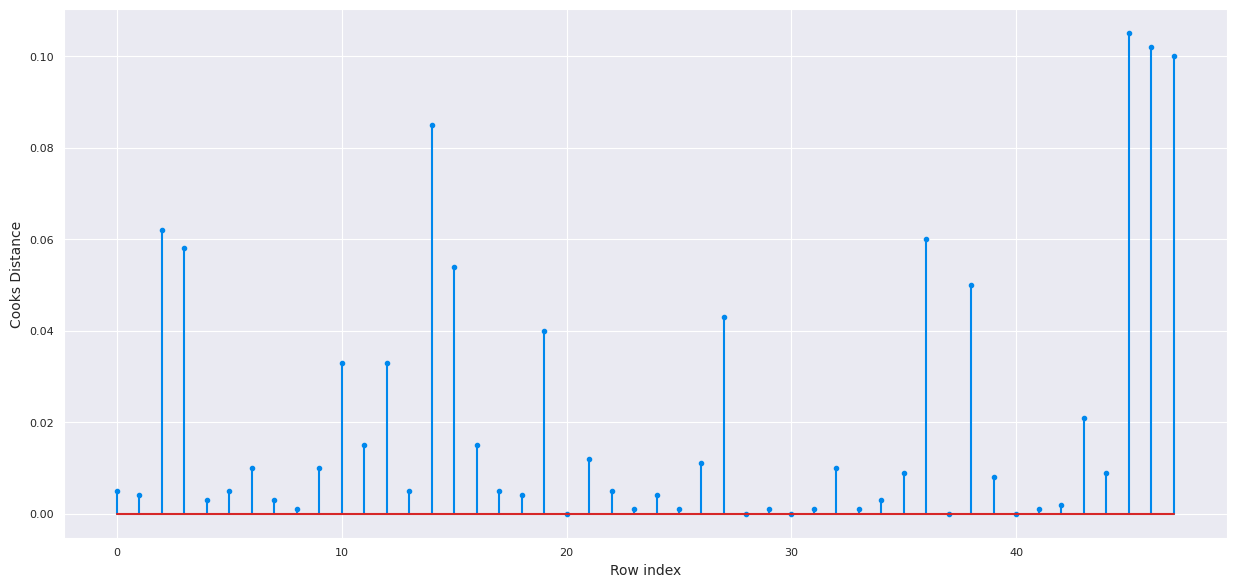

In [487]:
fig= plt.subplots(figsize=(15,7))
plt.stem(np.arange(len(startup1)),np.round(c_m,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [488]:
#index of the data points where c is more than .5
(np.argmax(c_m),np.max(c_m))

(45, 0.10453385753616816)

In [492]:
#Drop 45 observations
startup2=startup1.drop(startup1.index[[45]],axis=0).reset_index()

In [ ]:
startup2=startup2.drop(['index'],axis=1)
startup2

## **# Build Model on new data**

In [494]:
final_ml_m=smf.ols('Profit~rdspend+Mspend+State_California+State_Florida+State_NY',data=startup2).fit()

In [495]:
(final_ml_m.rsquared,final_ml_m.aic)

(0.961964957796737, 976.8263762776478)

In [496]:
#Again check for influencers
model_influence_m = final_ml_m.get_influence()
(c_m, _) = model_influence_m.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


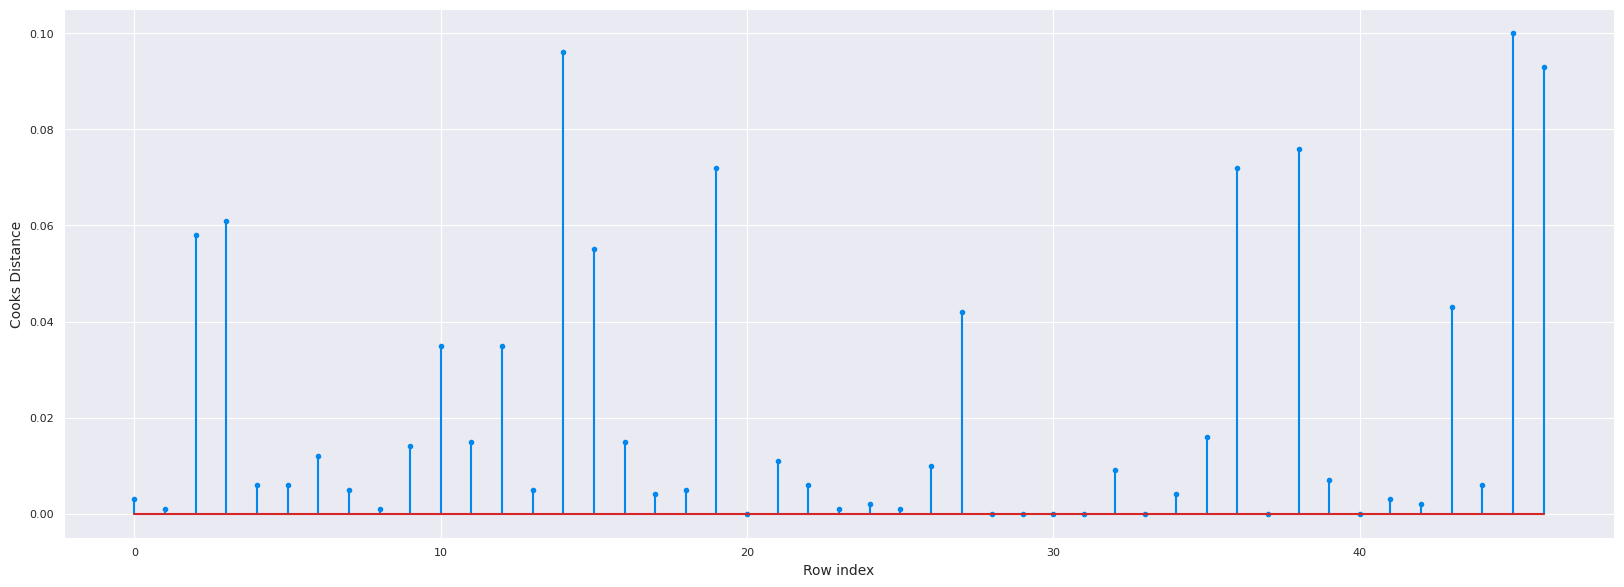

In [497]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup2)),np.round(c_m,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [498]:
#index of the data points where c is more than .5
(np.argmax(c_m),np.max(c_m))

(45, 0.10012291367608914)

## **#### Since the cook's value is <1 , we can stop the diagnostic process and finalize the model**

In [499]:
final_ml_m=smf.ols('Profit~rdspend+Mspend+State_California+State_Florida+State_NY',data=startup2).fit()

In [500]:
(final_ml_m.rsquared,final_ml_m.aic)

(0.961964957796737, 976.8263762776478)

## ** Predicting for new data 'admin':568943,'rdspend':500100,'Mspend':825800,**

In [501]:
startup1.head()

,rdspend,admin,Mspend,Profit,State_California,State_Florida,State_NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [505]:
#New data for prediction
new_data=pd.DataFrame({'rdspend':825895,'admin':510000,'Mspend':857980,'State_California':0,'State_Florida':0,'State_NY':1},index=[1])

In [506]:
final_ml_m.predict(new_data)

1    717109.183461
dtype: float64

## **PREDICTED PROFIT VALUES FOR STARTUP IN THE DATA SET**

In [ ]:
final_ml_m.predict(startup)

In [508]:
predicted_profit=final_ml_m.predict(startup)

In [ ]:
predicted_profit